<a href="https://colab.research.google.com/github/estherhdzc/BEDU-Proyecto-Final/blob/main/proyectofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis estadístico del desempeño académico de estudiantes de secundaria de Portugal
## Proyecto Final del Módulo 5 "Programación y manipulación de datos en R"
### Dataset proveniente de: [https://archive.ics.uci.edu/dataset/320/student+performance]
## A) Introducción.
### El presente trabajo tiene como propósito analizar el desempeño académico de estudiantes de secundaria de Portugal. Se utilizará el criterio de género para comparación de medias de calificaciones.
### Cabe hacer notar, que en Portugal, la escuela secundaria consta de 3 años.
### Las materias de Matemáticas y Lenguaje Portugués se evaluán en tres períodos parciales. Para propósitos de este estudio tomamos la calificación del examen final de ambas asignaturas (etiquetada como G3).
### La calificación numérica se obtiene con base en una escala que va del 0 al 20.
### Interpretación de la escala:
### 16-20 muy bueno
### 14-15 bueno
### 12-13 satisfactorio
### 10-11 suficiente
### 0-9 suspenso

## B) Antecedentes.
### De acuerdo con el último informe de PISA 2022, las chicas superan a los chicos en Lectura, pero estos últimos son mejores en Matemáticas. Por lo visto, existe una brecha de género en el sistema educativo. Particularmente, en Portugal, los niños superaron a las niñas en matemáticas por 11 puntos y las niñas superaron a los niños en lectura por 21 puntos.
### El Programa para la Evaluación Internacional de Alumnos (PISA, por sus siglas en inglés) evalúa los conocimientos y habilidades de los estudiantes de 15 años en matemáticas, lectura y ciencias.
### La base de datos recopila las calificaciones finales de estudiantes de último año de secundaria para pruebas de Lenguaje y Matemáticas.
### Problema de investigación: ¿Existe diferencia significativa entre hombres y mujeres con respecto a los resultados de pruebas de Lenguaje Portugués y Matemáticas?

## C) Objetivos.
### El presente proyecto tiene los siguientes objetivos:
### 1. Realizar un análisis estadístico de los datos de estudiantes: edad, género, calificaciones.
### 2. Realizar una prueba de hipótesis de comparación de medias para determinar si existen diferencias significativas entre estudiantes por género y de acuerdo con las pruebas de Matemáticas y Lenguaje Portugués.

## D) Análisis.

## Se cargan librerías y las bases de datos de las calificaciones de Matemáticas y Lenguaje Portugués.

In [ ]:
#Carga de librerías que incluye ggplot2, dplyr
library(tidyverse)
install.packages("rpart")
library(rpart)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
directory_mat <- "https://raw.githubusercontent.com/estherhdzc/BEDU-Proyecto-Final/main/student-mat.csv"


# Se lee el archivo de datos correspondientes a las calificaciones de Matemáticas
datos_mat<- read.csv(directory_mat, header=TRUE, sep="," )



In [ ]:
directory_por <- "https://raw.githubusercontent.com/estherhdzc/BEDU-Proyecto-Final/main/student-por.csv"


# Se lee el archivo de datos correspondientes a las calificaciones de Lenguaje Portugués
datos_por<- read.csv(directory_por, header=TRUE, sep="," )



## Análisis Exploratorio para ver el número de registros y los nulos en cada BD.

In [ ]:
#Explorando el dataframe resultante, observamos que hay 395 registros de estudiantes para Matemáticas
str(datos_mat)

'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

In [ ]:
#Explorando el dataframe resultante, observamos que hay 649 registros de estudiantes para Lenguaje Portugués
str(datos_por)

'data.frame':	649 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "no" "no" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $ h

In [ ]:
#Buscando valores nulos dentro del dataframe de Matemáticas
any(is.na(datos_mat))
mean(is.na(datos_mat))

[1] FALSE

[1] 0

In [ ]:
#Buscando valores nulos dentro del dataframe de Lenguaje Portugués
any(is.na(datos_por))
mean(is.na(datos_por))

[1] FALSE

[1] 0

## Revisando los datos mediante tablas de frecuencia y gráficas de frecuencia.

In [ ]:
## Obteniendo total de estudiantes por género en Matemáticas
datos_mat %>% count(sex) %>% group_by(sex)

sex,n
<chr>,<int>
F,208
M,187


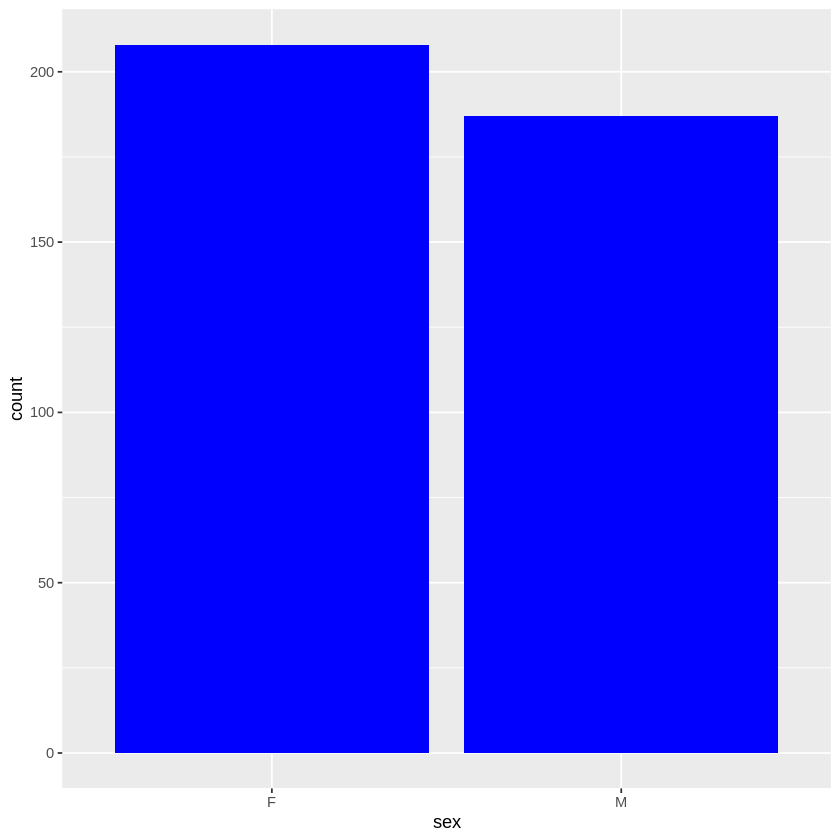

In [ ]:
#Se validan las poblaciones por género, en Matemáticas

ggplot(datos_mat, aes(x=sex))+geom_bar(fill="blue")

In [ ]:
## Obteniendo total de estudiantes por género en Lenguaje Portugués
datos_por %>% count(sex) %>% group_by(sex)

sex,n
<chr>,<int>
F,383
M,266


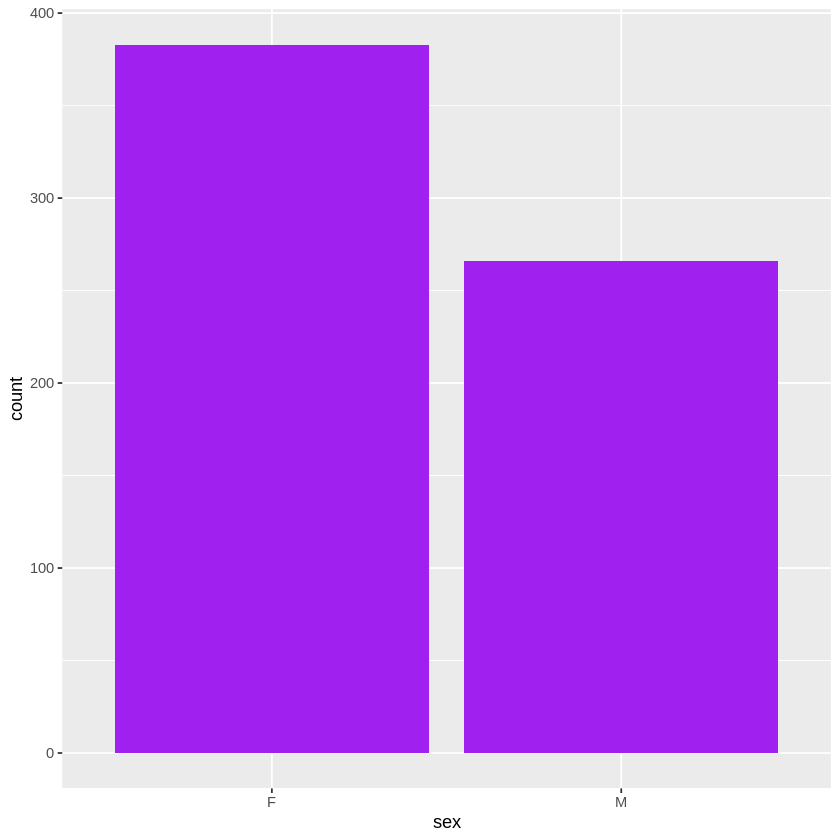

In [ ]:
#Se validan las poblaciones por género, en Lenguaje Portugués

ggplot(datos_por, aes(x=sex))+geom_bar(fill="purple")

## Cálculo de Estadísticos Descriptivos de las Calificaciones de Matemáticas.

In [ ]:
# Cálculo de la media, la mediana y la desviación estándar de las calificaciones del examen final de Matemáticas
media <- mean(datos_mat$G3)
desviacion <- sd(datos_mat$G3)
mediana<-median(datos_mat$G3)

print(paste("Promedio",media))
print(paste("Desviación estándar",desviacion))
print(paste("Mediana", mediana))

[1] "Promedio 10.4151898734177"
[1] "Desviación estándar 4.58144261099784"
[1] "Mediana 11"


## Obtención de cuartiles y boxplots para Matemáticas.

In [ ]:
## Obtenemos cuartiles de la calificación de Matemáticas.
quantile(x=datos_mat$G3, probs = c(0.25,0.50,0.75),type = 0)
cuartiles_m <-quantile(x=datos_mat$G3, probs = c(0.25,0.50,0.75),type = 0)
Q1_m <- cuartiles_m[1];
Q2_m<-cuartiles_m[2];
Q3_m<-cuartiles_m[3];
 #atipicos.menores_m <-Q1_m-1.5*(Q3_m - Q2_m)
 #atipicos.menores_m

25% 50% 75% 
  8  11  14

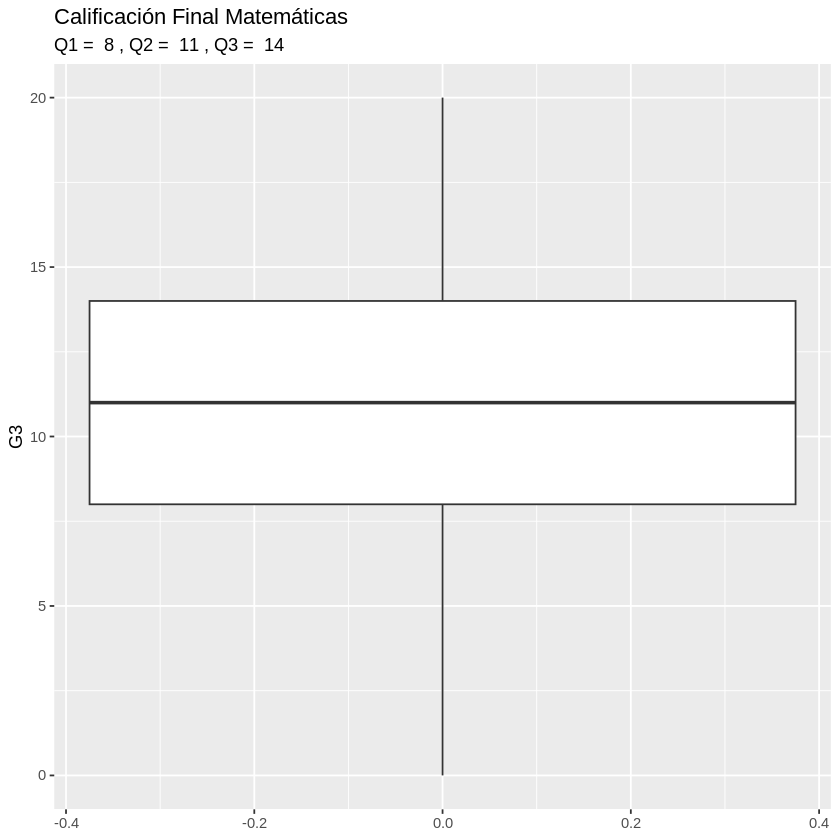

In [ ]:
#Se generan boxplots con los cuartiles de la calificación de Matemáticas
ggplot(data = datos_mat, mapping = aes(y=G3)) + geom_boxplot(outlier.colour="red") +
    labs(title = "Calificación Final Matemáticas ",subtitle =  paste("Q1 = ",Q1_m, ", Q2 = ",Q2_m, ", Q3 = ",Q3_m))

## Cálculo de Estadísticos Descriptivos de las Calificaciones de Lenguaje Portugués.

In [ ]:
# Cálculo de la media, la mediana y la desviación estándar de las calificaciones del examen final de Lenguaje Portugués
media <- mean(datos_por$G3)
desviacion <- sd(datos_por$G3)
mediana<-median(datos_por$G3)

print(paste("Promedio",media))
print(paste("Desviación estándar",desviacion))
print(paste("Mediana", mediana))

[1] "Promedio 11.9060092449923"
[1] "Desviación estándar 3.2306562428048"
[1] "Mediana 12"


## Obtención de cuartiles y boxplots para Lenguaje Portugués.

In [ ]:
## Obtenemos cuartiles de la calificación de Lenguaje Portugués
quantile(x=datos_por$G3, probs = c(0.25,0.50,0.75),type = 0)
cuartiles_p <-quantile(x=datos_por$G3, probs = c(0.25,0.50,0.75),type = 0)
Q1_p <- cuartiles_p[1];
Q2_p<-cuartiles_p[2];
Q3_p<-cuartiles_p[3];
 #atipicos.menores_p <-Q1_p-1.5*(Q3_p - Q2_p)
 #atipicos.menores_p

25% 50% 75% 
 10  12  14

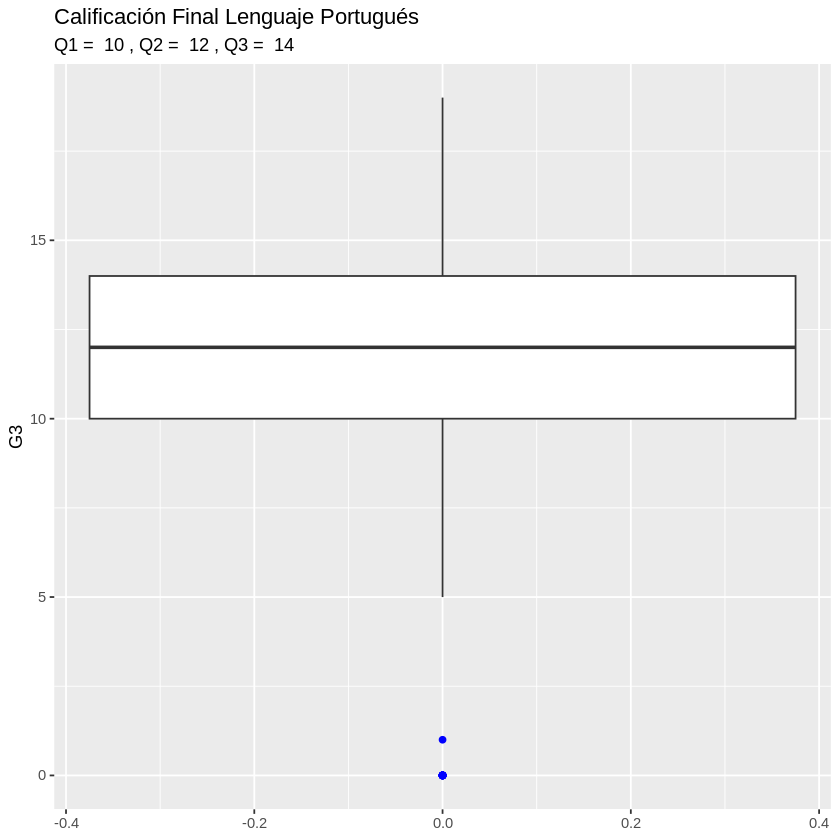

In [ ]:
#Se genera el boxplot con los cuartiles de la calificación de Lenguaje Portugués
ggplot(data = datos_por, mapping = aes(y=G3)) + geom_boxplot(outlier.colour="blue") +
    labs(title = "Calificación Final Lenguaje Portugués ",subtitle =  paste("Q1 = ",Q1_p, ", Q2 = ",Q2_p, ", Q3 = ",Q3_p))

## Boxplots por Género en Matemáticas y Lenguaje Portugués.

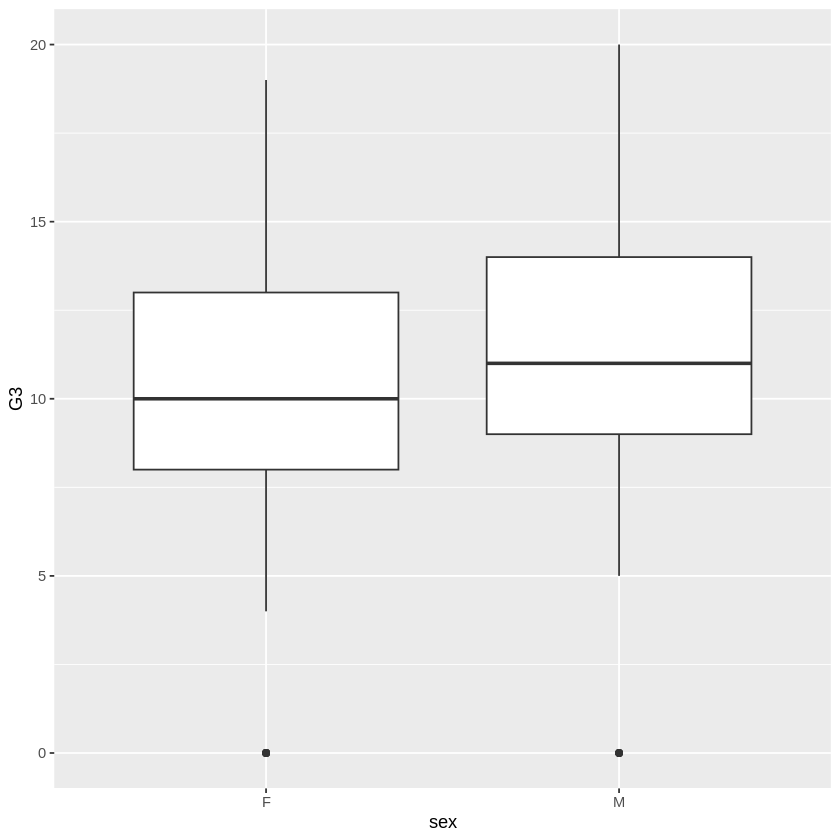

In [ ]:
# Se genera el boxplot de cada género en Matemáticas
ggplot(datos_mat, aes(x=sex,y=G3))+geom_boxplot()


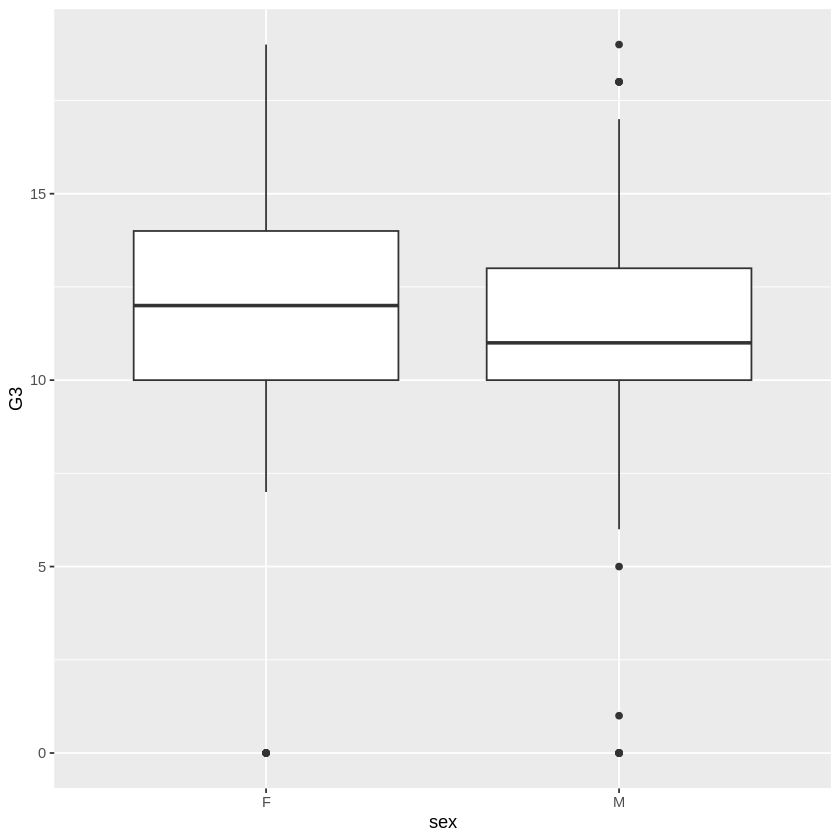

In [ ]:
# Se genera el boxplot de cada género en Lenguaje Portugués
ggplot(datos_por, aes(x=sex,y=G3))+geom_boxplot()


## Histogramas de Matemáticas y Lenguaje Portugués

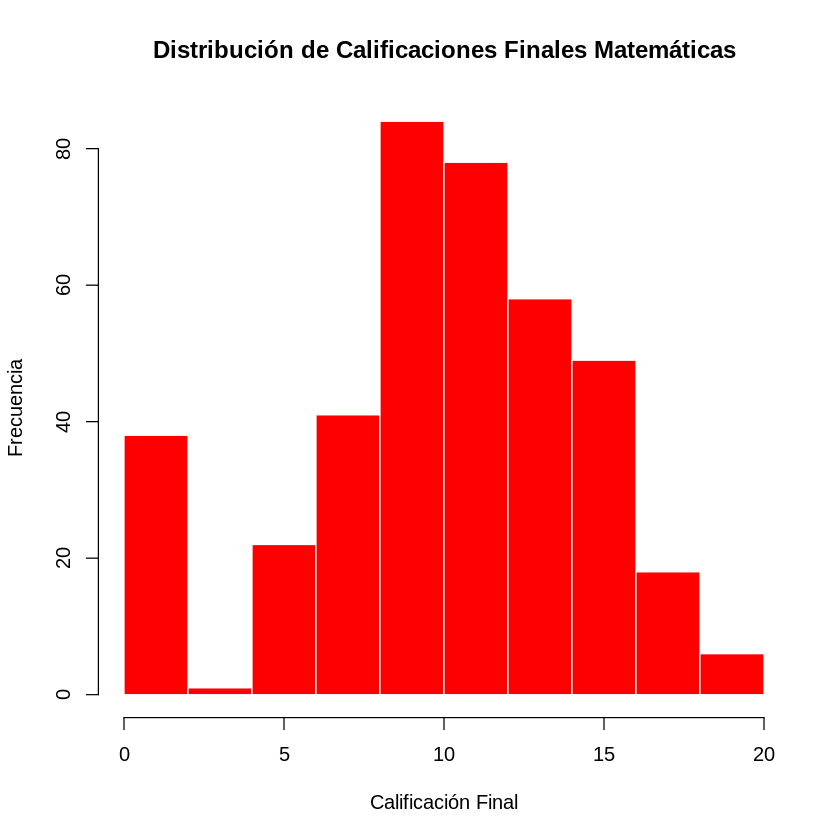

In [ ]:
####           Obtención de Estadísticos          ##

#Realizamos el histograma de todas las calificaciones en Matemáticas de los estudiantes, para observar la distribucion de los datos.

hist(datos_mat$G3,
     main = "Distribución de Calificaciones Finales Matemáticas",
     xlab = "Calificación Final",
     ylab = "Frecuencia",
     col = "red",
     border = "white")

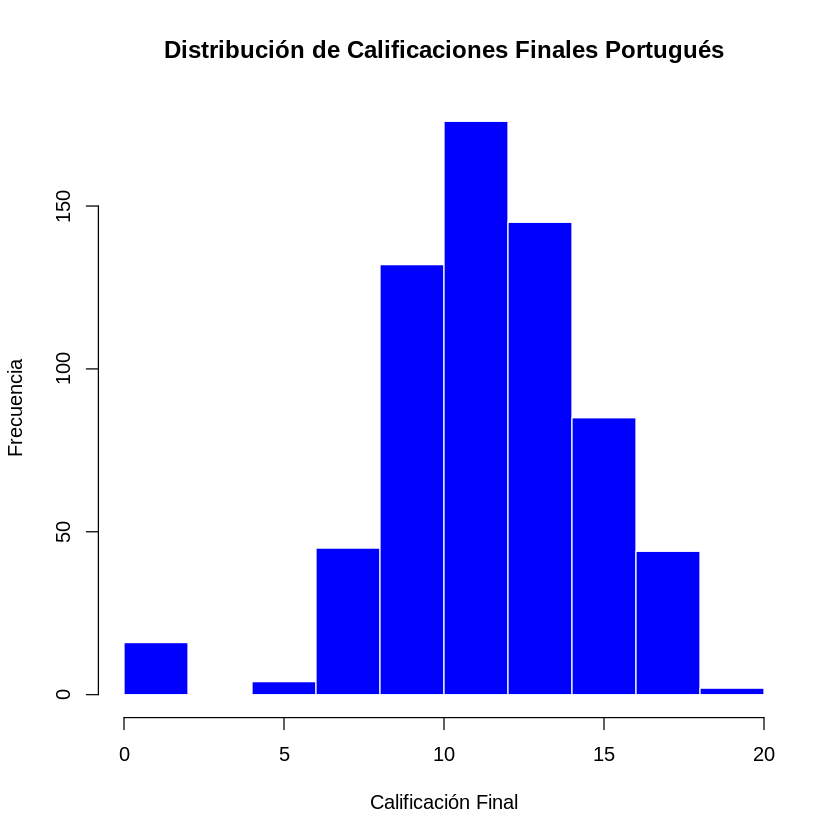

In [ ]:
####           Obtención de Estadísticos          ##

#Realizamos el histograma de todas las calificaciones en Lenguaje Portugués de los estudiantes, para observar la distribucion de los datos.

hist(datos_por$G3,
     main = "Distribución de Calificaciones Finales Portugués",
     xlab = "Calificación Final",
     ylab = "Frecuencia",
     col = "blue",
     border = "white")

## Densidad de Probabilidad para Matemáticas y Lenguaje Portugués

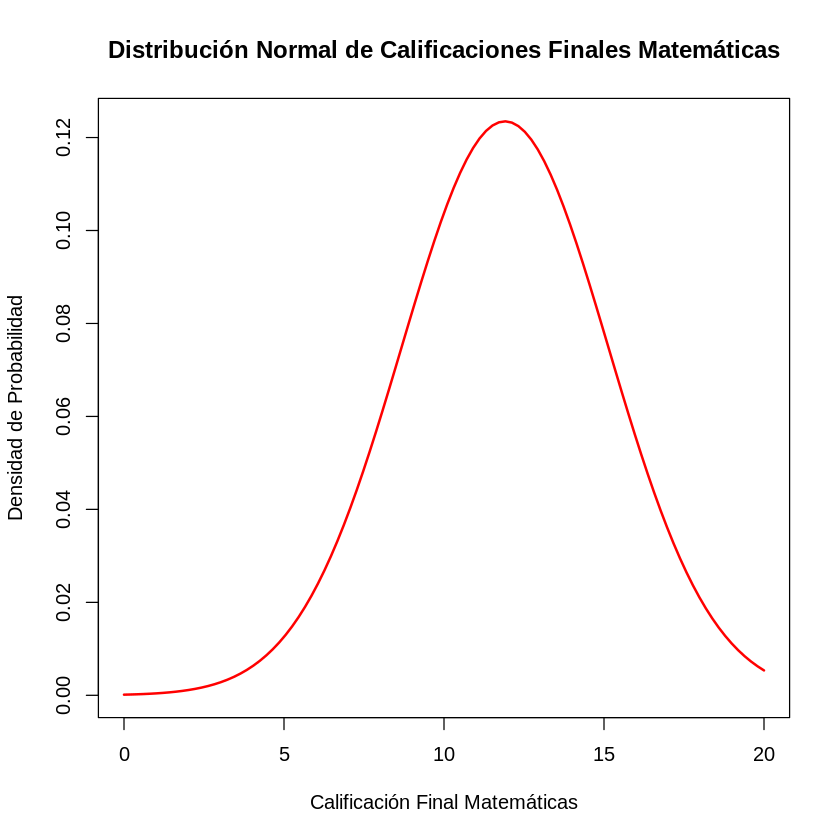

In [ ]:
#### # Generar valores en matématicas de una distribución normal usando la media y la desviación estándar observadas ####

x_m <- seq(0, 20, length.out = 100)
y_m <- dnorm(x_m, mean = media, sd = desviacion)

# Graficar la distribución normal
plot(x_m, y_m, type = "l", lwd = 2, col = "red",
     main = "Distribución Normal de Calificaciones Finales Matemáticas",
     xlab = "Calificación Final Matemáticas", ylab = "Densidad de Probabilidad")

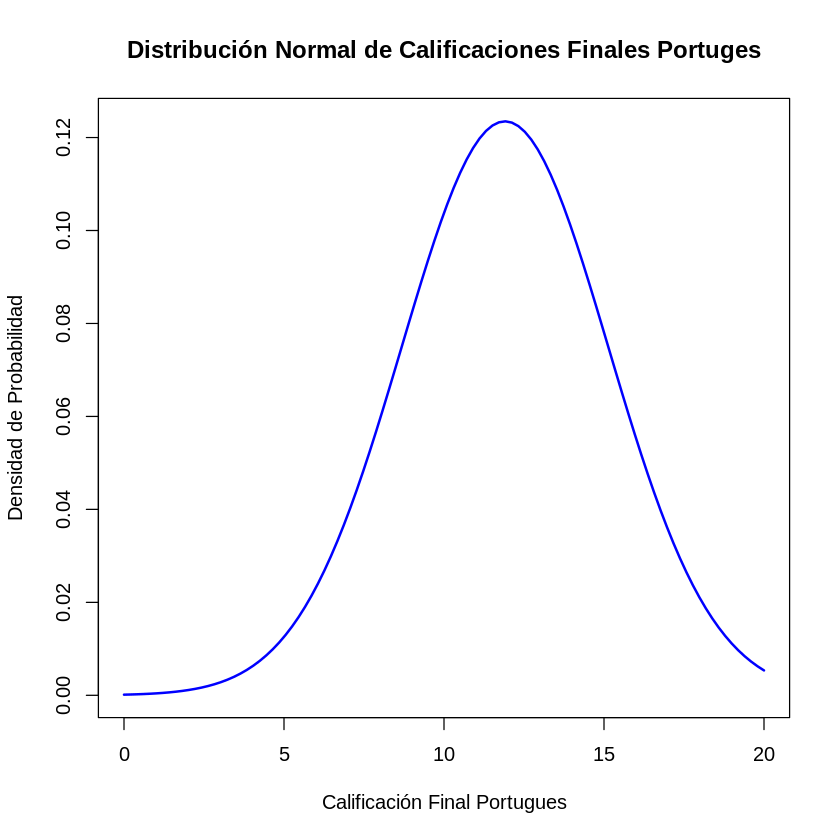

In [ ]:
#### # Generar valores en Lenguaje Portugués de una distribución normal usando la media y la desviación estándar observadas ####

x_p <- seq(0, 20, length.out = 100)
y_p <- dnorm(x_p, mean = media, sd = desviacion)

# Graficar la distribución normal
plot(x_p, y_p, type = "l", lwd = 2, col = "blue",
     main = "Distribución Normal de Calificaciones Finales Portuges",
     xlab = "Calificación Final Portugues", ylab = "Densidad de Probabilidad")

## Prueba de Normalidad para la Distribución de Calificaciones de Matemáticas


	Shapiro-Wilk normality test

data:  datos_mat$G3
W = 0.92873, p-value = 8.836e-13



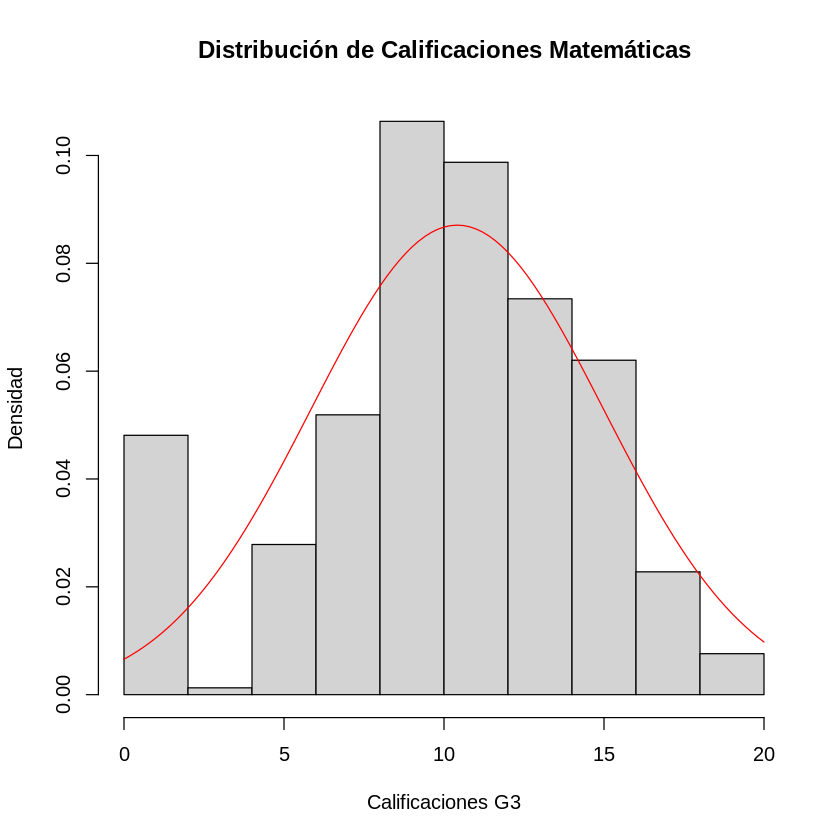

In [ ]:
## Prueba de Normalidad Calificaciones Matemáticas: Shapiro-Wilk

PNormalidadSW <- shapiro.test(datos_mat$G3)
print(PNormalidadSW) #Un p-value menor a 0.05 indica que el conjunto de datos tiende a una distribución normal.

#Gráfico de la distribución
plotn <- function(x,main="Histograma de frecuencias \ny distribución normal",
                  xlab="Calificaciones G3",ylab="Densidad") {
  min <- min(datos_mat$G3)
  max <- max(datos_mat$G3)
  media <- mean(datos_mat$G3)
  dt <- sd(datos_mat$G3)
  hist(datos_mat$G3,freq=F,main=main,xlab=xlab,ylab=ylab)
  curve(dnorm(x,media,dt), min, max,add = T,col="red")
}

plotn(x,main="Distribución de Calificaciones Matemáticas") #Grafico de valores

## Prueba de Normalidad para la Distribución de Calificaciones de Lenguaje Portugués



	Shapiro-Wilk normality test

data:  datos_por$G3
W = 0.92598, p-value < 2.2e-16



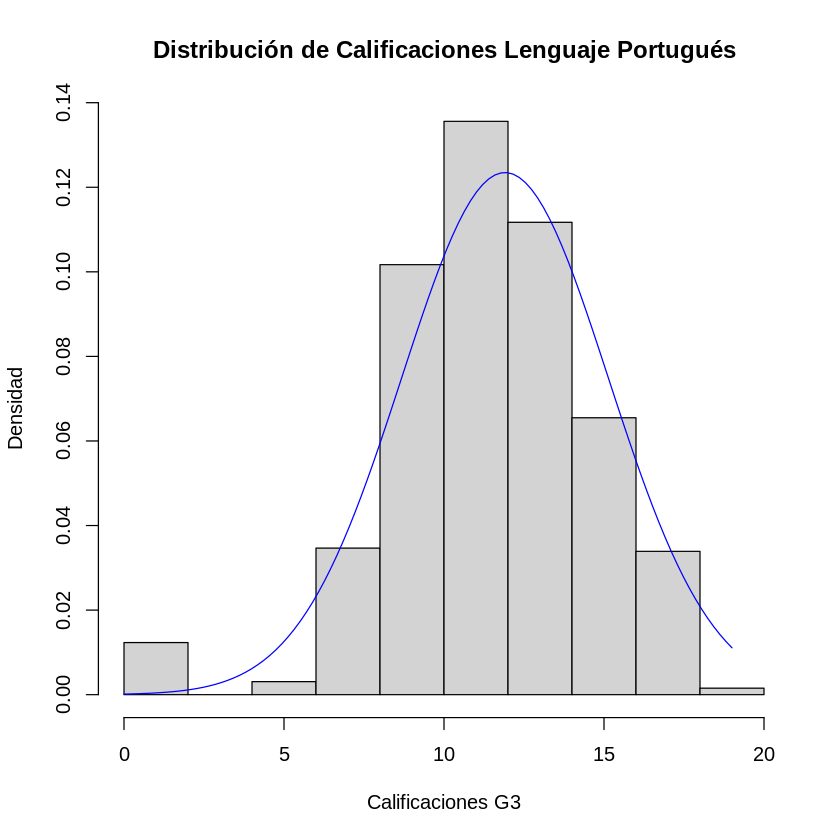

In [ ]:
## Prueba de Normalidad Calificaciones Lenguaje Portugués: Shapiro-Wilk

PNormalidadSW <- shapiro.test(datos_por$G3)
print(PNormalidadSW) #Un p-value menor a 0.05 indica que el conjunto de datos se comporta como una distribución normal.

#Gráfico de la distribución
plotn <- function(x,main="Histograma de frecuencias \ny distribución normal",
                  xlab="Calificaciones G3",ylab="Densidad") {
  min <- min(datos_por$G3)
  max <- max(datos_por$G3)
  media <- mean(datos_por$G3)
  dt <- sd(datos_por$G3)
  hist(datos_por$G3,freq=F,main=main,xlab=xlab,ylab=ylab)
  curve(dnorm(x,media,dt), min, max,add = T,col="blue")
}

plotn(x,main="Distribución de Calificaciones Lenguaje Portugués") #Grafico de valores

## PRUEBAS DE HIPÓTESIS

## ANOVA Matemáticas (Diferencia de Medias entre hombres y mujeres).
### Ho: La diferencia de medias entre hombres y mujeres es igual a cero.
### Ha: La diferencia de medias entre hombres y mujeres es diferente de cero.

In [ ]:
########                     ANOVA            ########################################################
# Se realiza el análisis de varianza (ANOVA)
# utilizando la función aov(), con la calificación final (G3) como variable dependiente y el
# género (sex) como variable independiente.

modelo_anova <- aov(G3 ~ sex, data = datos_mat)

# Se otienen los resultados de ANOVA mediante la función summary
summary(modelo_anova)

             Df Sum Sq Mean Sq F value Pr(>F)  
sex           1     89   88.51   4.252 0.0399 *
Residuals   393   8181   20.82                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## ANOVA Lenguaje Portugués (Diferencia de Medias entre hombres y mujeres)
### Ho: La diferencia de medias entre hombres y mujeres es igual a cero.
### Ha: La diferencia de medias entre hombres y mujeres es diferente de cero.

In [ ]:
########                     ANOVA            ########################################################
# Se realiza el análisis de varianza (ANOVA)
# utilizando la función aov(), con la calificación final (G3) como variable dependiente y el
# género (sex) como variable independiente.

modelo_anova <- aov(G3 ~ sex, data = datos_por)

# Se otienen los resultados de ANOVA mediante la función summary
summary(modelo_anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sex           1    113  112.68   10.96 0.000982 ***
Residuals   647   6651   10.28                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Prueba t de Student

In [ ]:
#### Prueba de Hipótesis para Matemáticas ###

# Realizar la prueba t de student para comparar la media de las calificaciones finales entre hombres y mujeres para Matemáticas.

#Ho: La diferencia de medias entre hombres y mujeres es igual a cero.
#Ha: La diferencia de medias entre hombres y mujeres es diferente de cero.

prueba_t <- t.test(G3 ~ sex, data = datos_mat)

# Mostrar los resultados de la prueba t
prueba_t


	Welch Two Sample t-test

data:  G3 by sex
t = -2.0651, df = 390.57, p-value = 0.03958
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -1.85073226 -0.04545244
sample estimates:
mean in group F mean in group M 
       9.966346       10.914439 


In [75]:
#### Prueba de Hipótesis para Lenguaje Portugués ###

# Realizar la prueba t de student para comparar la media de las calificaciones finales entre hombres y mujeres para Lenguaje Portugués.

#Ho: La diferencia de medias entre hombres y mujeres es igual a cero.
#Ha: La diferencia de medias entre hombres y mujeres es diferente de cero.

prueba_t <- t.test(G3 ~ sex, data = datos_por)

# Mostrar los resultados de la prueba t
prueba_t


	Welch Two Sample t-test

data:  G3 by sex
t = 3.2747, df = 547.44, p-value = 0.001125
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 0.3390334 1.3554639
sample estimates:
mean in group F mean in group M 
       12.25326        11.40602 


## Conclusiones.

### 1. Los datos de las calificaciones en Matemáticas y en Lenguaje Portugués siguen una Distribución Normal.
### 2. Aritméticamente, la Media en Matemáticas es mayor en los hombres que en las mujeres. Y la Media en Lenguaje Portugués es mayor en las mujeres que en los hombres.
### 3. Al realizar la prueba de hipótesis de comparación de medias en Matemáticas, se determinó que si existen diferencias significativas entre estudiantes de acuerdo con el género; es decir, las calificaciones de los hombres son significativamente mayores que las calificaciones de las mujeres.
### 4. Al realizar la prueba de hipótesis de comparación de medias en Lenguaje, se determinó que si existen diferencias significativas entre estudiantes de acuerdo con el género; es decir, las calificaciones de las mujeres son significativamente mayores que las calificaciones de los hombres.
### 5. Por lo tanto, si existe diferencia significativa entre hombres y mujeres con respecto a los resultados de las pruebas de Matemáticas y Lenguaje Portugués.
